In [1]:
!unzip '/content/drive/MyDrive/Deep_learning/Datasets/titanic.zip'

Archive:  /content/drive/MyDrive/Deep_learning/Datasets/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!pip install keras-tuner

In [185]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from tensorflow.keras import callbacks
import matplotlib.pyplot as plt

In [186]:
dataset = pd.read_csv('/content/train.csv')

In [187]:
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [189]:
dataset = dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [190]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [192]:
dataset['Survived'].unique(), dataset['Embarked'].unique()

(array([0, 1]), array(['S', 'C', 'Q', nan], dtype=object))

In [193]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [194]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [195]:
dataset['Age'].mean()

29.69911764705882

In [196]:
dataset['Age'] = dataset['Age'].replace(np.NaN, dataset['Age'].mean())

In [197]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [198]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True, prefix='sex')
pclass = pd.get_dummies(dataset['Pclass'], drop_first=True, prefix='pclass')
embarked = pd.get_dummies(dataset['Embarked'], dummy_na=True, drop_first=True, prefix='emnarked')

In [199]:
dataset = dataset.drop(columns=['Sex','Pclass','Embarked'])
dataset = pd.concat([dataset,sex,pclass,embarked], axis=1)

In [200]:
print(dataset.shape)
dataset.head()

(891, 11)


,Survived,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
0,0,22.0,1,0,7.2500,1,0,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0


In [201]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Age           891 non-null    float64
 2   SibSp         891 non-null    int64  
 3   Parch         891 non-null    int64  
 4   Fare          891 non-null    float64
 5   sex_male      891 non-null    uint8  
 6   pclass_2      891 non-null    uint8  
 7   pclass_3      891 non-null    uint8  
 8   emnarked_Q    891 non-null    uint8  
 9   emnarked_S    891 non-null    uint8  
 10  emnarked_nan  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 40.2 KB


In [202]:
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

In [203]:
X.head()

,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
0,22.0,1,0,7.2500,1,0,1,0,1,0
1,38.0,1,0,71.2833,0,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1,0
3,35.0,1,0,53.1000,0,0,0,0,1,0
4,35.0,0,0,8.0500,1,0,1,0,1,0


In [204]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [205]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [206]:
len(X_train), len(y_train), len(X_test), len(y_test)

(623, 623, 268, 268)

In [207]:
X_train.head()

,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
445,4.000000,0,2,81.8583,1,0,0,0,1,0
650,29.699118,0,0,7.8958,1,0,1,0,1,0
172,1.000000,1,1,11.1333,0,0,1,0,1,0
450,36.000000,1,2,27.7500,1,1,0,0,1,0
314,43.000000,1,1,26.2500,1,1,0,0,1,0


In [208]:
X_test.head()

,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
709,29.699118,1,1,15.2458,1,0,1,0,0,0
439,31.000000,0,0,10.5000,1,1,0,0,1,0
840,20.000000,0,0,7.9250,1,0,1,0,1,0
720,6.000000,0,1,33.0000,0,1,0,0,1,0
39,14.000000,1,0,11.2417,0,0,1,0,0,0


In [ ]:
norm = MinMaxScaler()
X_train[['Age','SibSp','Parch','Fare']] = norm.fit_transform(X_train[['Age','SibSp','Parch','Fare']])
X_test[['Age','SibSp','Parch','Fare']] = norm.transform(X_test[['Age','SibSp','Parch','Fare']])

In [210]:
X_train.head()

,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
445,0.044986,0.000,0.333333,0.159777,1,0,0,0,1,0
650,0.367921,0.000,0.000000,0.015412,1,0,1,0,1,0
172,0.007288,0.125,0.166667,0.021731,0,0,1,0,1,0
450,0.447097,0.125,0.333333,0.054164,1,1,0,0,1,0
314,0.535059,0.125,0.166667,0.051237,1,1,0,0,1,0


In [211]:
X_train.describe()

,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.363464,0.072030,0.064473,0.062149,0.658106,0.211878,0.565008,0.088283,0.733547,0.001605
std,0.163710,0.152033,0.134615,0.099599,0.474725,0.408967,0.496154,0.283933,0.442459,0.040064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.434531,0.125000,0.000000,0.060020,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
X_test.describe()

,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.378280,0.049907,0.061567,0.064508,0.623134,0.194030,0.518657,0.082090,0.697761,0.003731
std,0.162453,0.095633,0.133936,0.090813,0.485507,0.396192,0.500587,0.275015,0.460087,0.061085
min,0.005152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280598,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.447097,0.125000,0.000000,0.060642,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,0.886906,0.500000,0.833333,0.512122,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [213]:
def build_model(hp):
    model = keras.Sequential()
    model.add(
            layers.Dense(
                units=32,
                activation="relu",
                input_dim=10
            )
        )
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(
            layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [214]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [215]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [216]:
tuner.search(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.5932835936546326

Best val_accuracy So Far: 0.694029837846756
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit


In [217]:
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 416
units_1: 320
learning_rate: 0.0001
units_2: 32
Score: 0.694029837846756
Trial summary
Hyperparameters:
num_layers: 8
units_0: 192
units_1: 64
learning_rate: 0.0001
units_2: 448
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 0.680970162153244
Trial summary
Hyperparameters:
num_layers: 17
units_0: 192
units_1: 192
learning_rate: 0.01
units_2: 192
units_3: 160
units_4: 32
units_5: 64
units_6: 192
units_7: 224
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
Score: 0.5932835936546326


In [218]:
model = tuner.get_best_models(num_models=1)[0]

In [219]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 416)               13728     
_________________________________________________________________
dense_2 (Dense)              (None, 320)               133440    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                10272     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 157,825
Trainable params: 157,825
Non-trainable params: 0
_________________________________________________________________


In [220]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

model_history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test), initial_epoch=3, callbacks =[earlystopping])

Epoch 4/100
20/20 [==============================] - 1s 12ms/step - loss: 0.5982 - accuracy: 0.7801 - val_loss: 0.5915 - val_accuracy: 0.7575
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5638 - accuracy: 0.7817 - val_loss: 0.5618 - val_accuracy: 0.7873
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5340 - accuracy: 0.8058 - val_loss: 0.5358 - val_accuracy: 0.7948
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.8090 - val_loss: 0.5164 - val_accuracy: 0.7910
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4886 - accuracy: 0.8122 - val_loss: 0.5034 - val_accuracy: 0.7948
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 0.8010 - val_loss: 0.4966 - val_accuracy: 0.7985
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4654 - accuracy: 0.8138 - val_loss: 0.4913 - val_accuracy: 0.8022
Epoch 11/10

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


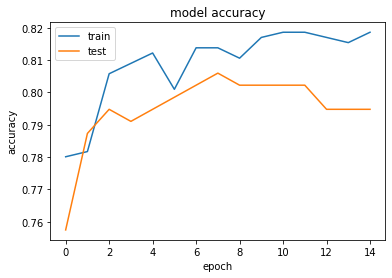

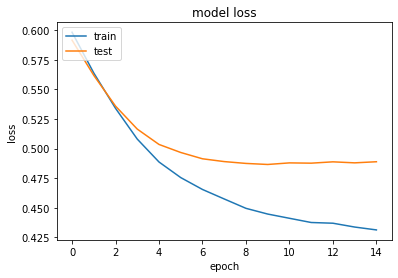

In [221]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [222]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [223]:
print(accuracy_score(y_pred,y_test))

0.8022388059701493


In [224]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,146,11
1,42,69


# Prediction on test data

In [225]:
data = pd.read_csv('/content/test.csv')
dataset = data.copy()
dataset = dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [226]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [227]:
dataset['Age'] = dataset['Age'].replace(np.NaN, 29.69911764705882)
dataset['Fare'] = dataset['Fare'].replace(np.NaN, dataset['Fare'].mean())
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [228]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True, prefix='sex')
pclass = pd.get_dummies(dataset['Pclass'], drop_first=True, prefix='pclass')
embarked = pd.get_dummies(dataset['Embarked'], dummy_na=True, drop_first=True, prefix='emnarked')

dataset = dataset.drop(columns=['Sex','Pclass','Embarked'])
dataset = pd.concat([dataset,sex,pclass,embarked], axis=1)

print(dataset.shape)
dataset.head()

(418, 10)


,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
0,34.5,0,0,7.8292,1,0,1,1,0,0
1,47.0,1,0,7.0000,0,0,1,0,1,0
2,62.0,0,0,9.6875,1,1,0,1,0,0
3,27.0,0,0,8.6625,1,0,1,0,1,0
4,22.0,1,1,12.2875,0,0,1,0,1,0


In [229]:
dataset[['Age','SibSp','Parch','Fare']] = norm.transform(dataset[['Age','SibSp','Parch','Fare']])
dataset.describe()

,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0
mean,0.373644,0.055921,0.065391,0.069540,0.636364,0.222488,0.521531,0.110048,0.645933,0.0
std,0.158792,0.112095,0.163571,0.108993,0.481622,0.416416,0.500135,0.313324,0.478803,0.0
min,-0.003141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.283740,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.367921,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000,0.000000,1.000000,0.0
75%,0.443956,0.125000,0.000000,0.061484,1.000000,0.000000,1.000000,0.000000,1.000000,0.0
max,0.949736,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [230]:
dataset.head()

,Age,SibSp,Parch,Fare,sex_male,pclass_2,pclass_3,emnarked_Q,emnarked_S,emnarked_nan
0,0.428248,0.000,0.000000,0.015282,1,0,1,1,0,0
1,0.585323,0.125,0.000000,0.013663,0,0,1,0,1,0
2,0.773813,0.000,0.000000,0.018909,1,1,0,1,0,0
3,0.334004,0.000,0.000000,0.016908,1,0,1,0,1,0
4,0.271174,0.125,0.166667,0.023984,0,0,1,0,1,0


In [251]:
y_val = model.predict(dataset)
y_val = y_val > 0.5

In [252]:
y_val[:10]

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [253]:
y_val = y_val * 1

In [254]:
y_val[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [255]:
result = []
for i in y_val:
  result.append(i.tolist()[0])
print(result[:10])

[0, 1, 0, 0, 0, 0, 1, 0, 1, 0]


In [256]:
sub = {
    'PassengerId':data['PassengerId'],
    'Survived':result
}
df = pd.DataFrame(sub)
df.to_csv('gender_submission.csv',index=False)